In [15]:
import pandas as pd
leak_location_data = pd.read_csv('leak_locations_and_rate.csv')
sensor_data = pd.read_csv('sensor_readings.csv')
wind_data = pd.read_csv('weather_data.csv')


In [16]:
wind_data.describe()

,Barometric_Pressure,Humidity,Temperature,Wind_Direction,Wind_Speed
count,86401.000000,86401.000000,86401.000000,86401.000000,86401.000000
mean,822.635044,25.114295,14.354231,270.421966,4.075831
std,2.466726,15.350057,5.831301,82.991349,3.041347
min,818.157241,4.486563,2.610212,1.976088,0.083031
25%,820.258622,10.202212,8.739184,215.062650,1.315617
50%,822.606084,25.001702,13.569797,254.872175,3.594934
75%,824.470893,37.396917,20.138926,330.291338,6.361213
max,827.301068,60.292657,26.744342,539.468046,17.576875


In [17]:
''' Leakage (fume clouds) originates from the pipes.
Wind displaces the fume cloud.
Calculate the 2d coordinate point of the front/head of the fume.

Try to create a displacement vector of fume plus wind. 
The vector origin is at the startime of the wind data,
and the vector head at the endtime of the wind data.
'''
# def calculate_fume_cloud():
  

' Leakage (fume clouds) originates from the pipes.\nWind displaces the fume cloud.\nCalculate the 2d coordinate point of the front/head of the fume.\n\nTry to create a displacement vector of fume plus wind. \nThe vector origin is at the startime of the wind data,\nand the vector head at the endtime of the wind data.\n'

In [18]:
'''
The coordinates of the sensors are at fixed locations.
Pass the head of the fume cloud as this functions parameter.
Calculate the distance between the head of the fume and all the sensors. Return the sensor that has the shortest distance from the fume.
'''
sensor_coordinates = [
  #Upper four sensors
  (-105.14055, 40.595561), (-105.140583, 40.596108), (-105.140069, 40.595556), (-105.140075, 40.596114),

  #Middle four sensors
  (-105.140583, 40.596108), (-105.140069, 40.595556), (-105.14055, 40.595561), (-105.140075, 40.596114),

  # Bottom four sensor
  (), (), (), ()
]
# def nearest_sensor(fume_cloud_cords):


In [19]:
# SUCCESS, ABLE TO RETRIEVE ALL ROWS WITH FUGITIVE
my_value = "Fugitive"
results = leak_location_data.loc[leak_location_data["EmissionCategory"] == my_value]
results.describe()

,EventID,NumberSourcesLeaking,Latitude,Longitude,Duration,LeakRate,tStart,tEnd
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01,6.100000e+01
mean,49.032787,2.245902,40.595805,-105.139778,1681.983607,55.338510,1.681809e+09,1.681811e+09
std,12.128434,0.623317,0.000124,0.000364,1369.646092,20.943607,2.561132e+04,2.556986e+04
min,31.000000,1.000000,40.595615,-105.140350,899.000000,24.248856,1.681776e+09,1.681777e+09
25%,38.000000,2.000000,40.595665,-105.140270,900.000000,36.636270,1.681784e+09,1.681785e+09
50%,46.000000,2.000000,40.595830,-105.139824,901.000000,56.364502,1.681801e+09,1.681802e+09
75%,60.000000,3.000000,40.595924,-105.139420,2700.000000,65.485450,1.681838e+09,1.681838e+09
max,67.000000,3.000000,40.595943,-105.139390,7200.000000,98.832370,1.681853e+09,1.681854e+09


In [32]:
df1 = pd.DataFrame(results, columns=['LeakPointId', 'Longitude', 'Latitude', 'Duration', 'LeakRate', 'UTCStart'])
df1['Magnitudes'] = df1['Duration'] * df1['LeakRate']
df1.describe()
df1

,LeakPointId,Longitude,Latitude,Duration,LeakRate,UTCStart,Magnitudes
0,4T-3`1`,-105.139824,40.595830,900,36.636270,2023-04-18_00:00:35.000000,32972.643000
1,5S-26,-105.139390,40.595924,900,64.621765,2023-04-18_00:00:35.000000,58159.588500
2,4W-27,-105.140270,40.595936,2700,55.385376,2023-04-18_00:15:35.000000,149540.515200
3,4S-43,-105.140350,40.595642,2700,24.345577,2023-04-18_00:15:35.000000,65733.057900
4,4T-31,-105.139824,40.595830,1800,36.636270,2023-04-18_00:15:35.000000,65945.286000
...,...,...,...,...,...,...,...
75,5S-26,-105.139390,40.595924,2701,65.485450,2023-04-18_18:20:39.000000,176876.200450
94,4S-21,-105.140270,40.595665,899,33.108730,2023-04-18_21:23:59.000000,29764.748270
95,4T-11,-105.139890,40.595750,899,65.216900,2023-04-18_21:23:59.000000,58629.993100
96,5W-13,-105.139420,40.595615,899,85.664505,2023-04-18_21:23:59.000000,77012.389995


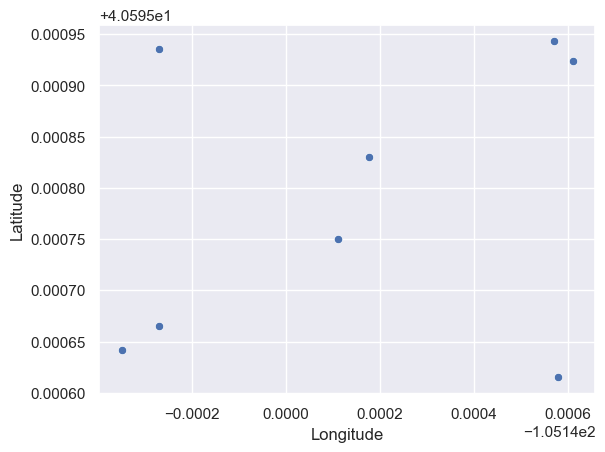

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
graph1 = sns.scatterplot(data=leak_location_data, x="Longitude", y="Latitude")
# Note, some of the events have the same longitude and latitude coordinates. So within the 61 different, some stack on each other

In [33]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool

TOOLTIPS = HoverTool(tooltips=[
  ("LeakPointId", "@LeakPointId"),
  #("(Longitude, Latitude)", "(@Longitude, @Latitude)"),
  ("UTCStart", "@UTCStart")
])

# set output to static HTML file
output_file(filename="custom_filename.html", title="Static HTML file")

p = figure(title="Fugitive Cases", x_axis_label='Longitude', y_axis_label='Latitude', width=1000, height=600, tools=[TOOLTIPS])
p.circle('Longitude', 'Latitude', size=10, source=df1)
show(p)
